<a href="https://colab.research.google.com/github/SondipPoulSingh/Deep-Learning/blob/main/ImageSegmentation_PART1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Image Segmentation

*Image segmentation is a method in which a digital image is broken down into various subgroups called Image segments which helps in reducing the complexity of the image to make further processing or analysis of the image simpler. Segmentation in easy words is assigning labels to pixels.*<br>
[Text source](https://towardsdatascience.com)<br>
[Image Source : Google](https://google.com)

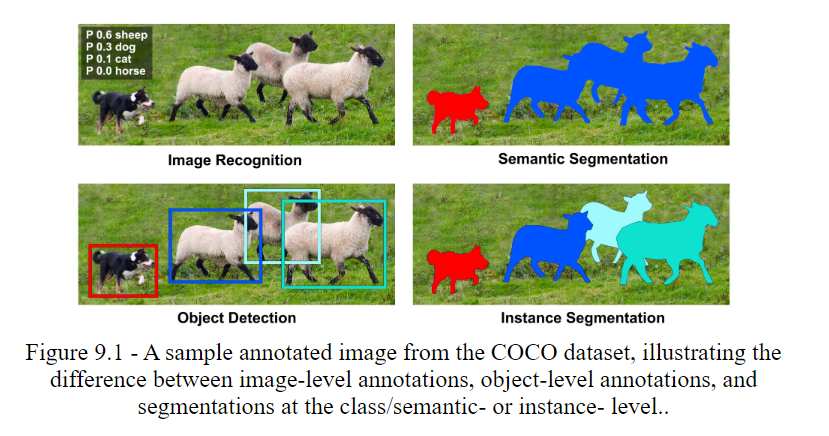

### Methods for Image Segmentation
Thresholding: This process involves converting an image into a binary format by setting a threshold value for pixel intensity. Pixels with intensity values above the threshold are set to 1, while pixels below the threshold are set to 0.

 **Clustering: This process groups similar pixels together based on color, texture, or other features. K-means is a popular clustering algorithm used for image segmentation.**

Edge detection: This process involves finding boundaries or edges in an image by identifying areas of rapid intensity change. Canny edge detection is a widely used algorithm in image segmentation.

Region-based: This process segments an image by grouping pixels into coherent regions or objects. Watershed algorithm, Graph Cut, and GrabCut are examples of region-based segmentation methods.

**Deep Learning: This process uses deep neural network models such as fully convolutional networks (FCN) and U-Net to segment images. These models are trained on large datasets of labeled images and can learn to segment images with high accuracy.**

In [ ]:
# https://towardsdatascience.com/auto-encoder-what-is-it-and-what-is-it-used-for-part-1-3e5c6f017726
# Autoencoder is an unsupervised artificial neural network that learns how to efficiently 
# compress and encode data then learns how to reconstruct the data back from the reduced 
# encoded representation to a representation that is as close to the original input as possible.
# Detect Anomalies
# Image Denoising

In [ ]:
# I will try out the clustering and FCN/UNet methods to segment the images.
# K means clustering can be used to segment images.
# First looking into how k means works.

In [ ]:
# k stands for num of clusters in k-Means algorithm.
# First k random point value will act as centroids.
# From each centroid find the euclidean distances of each point.
# By finding the minimum distance points will assign into clusters.
# Next find the mean values of each clusters(by averaging the feature values)
# This mean will lead to a new centroid.
# Repeat the proces until the centroid values remain unchanged.
 

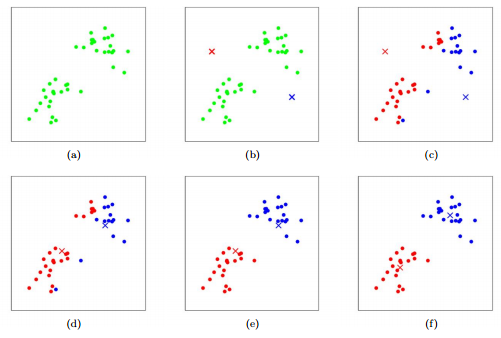

In [ ]:
# dataset from https://www.kaggle.com/code/samuelcortinhas/k-means-from-scratch/data

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/cluster_data.csv')
df.head()

,x,y,color
0,516.012706,393.014514,0
1,436.211762,408.656585,0
2,512.052601,372.022014,0
3,489.140464,401.807159,0
4,446.207986,338.516682,0


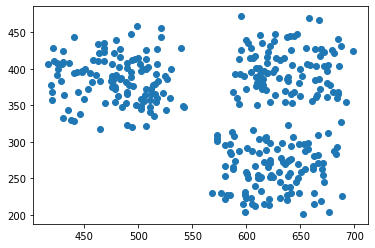

In [ ]:
plt.scatter(df['x'],df['y'])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
pred = KMeans( n_clusters=3).fit_predict(df.iloc[:,:-1])

In [ ]:
pred # predictions what the model finds for each data point

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

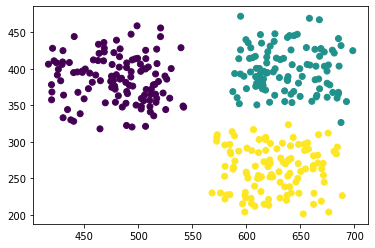

In [ ]:
plt.scatter(df['x'],df['y'], c=pred)

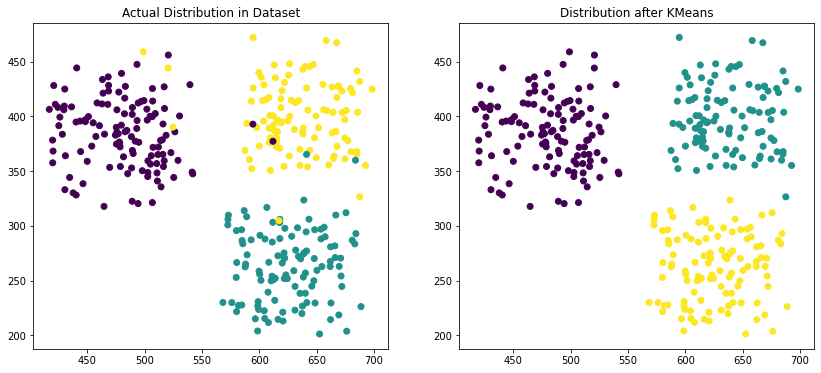

In [ ]:
fig, axes= plt.subplots(nrows=1,ncols=2,figsize=(14,6))
axes[0].scatter(df['x'],df['y'], c=df['color'])
axes[0].set_title("Actual Distribution in Dataset")
axes[1].scatter(df['x'],df['y'], c=pred)
axes[1].set_title("Distribution after KMeans")
plt.show()

In [ ]:
# Sometimes there are no way to know how much clusters we should have.
# Elbow method helps us to find the correct number of clusters.
# The method finds cluster vs errors and takes cluster number in a point where 
# the error looks stable.

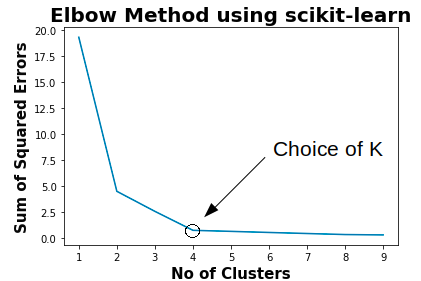

In [ ]:
# Finding the number of clusrer
errors=[]
for i in range(1,15):
  km = KMeans(n_clusters=i)
  km.fit_predict(df.iloc[:,:-1])
  errors.append(km.inertia_) # inertia holds the distance (error) values

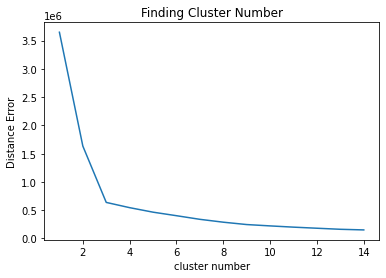

In [ ]:
cluster_no=range(1,15)
plt.plot(cluster_no,errors)
plt.title('Finding Cluster Number')
plt.xlabel('cluster number')
plt.ylabel('Distance Error')
plt.show() # clearly choosing 3 gives the best result

In [ ]:
# K means clustering on image segmentation

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

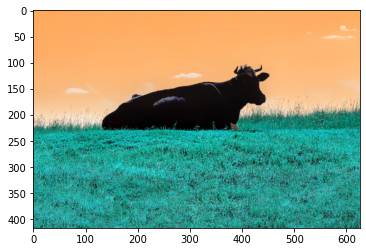

In [ ]:
original_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/images for Segmentation/goru.webp")
plt.imshow(original_image)

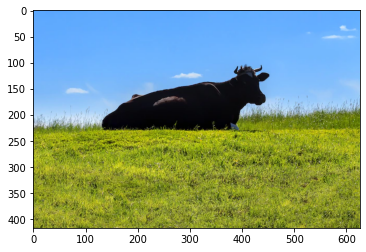

In [ ]:
img = np.flip(original_image, axis=-1) #This can convert both ways. From RGB to BGR, and from BGR to RGB.
plt.imshow(img)

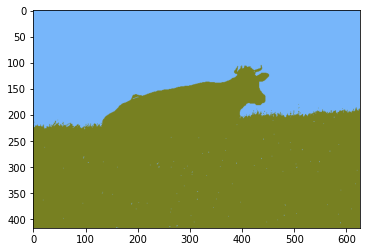

In [ ]:
#img = cv2.imread('home.jpg')
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
plt.imshow(res2)

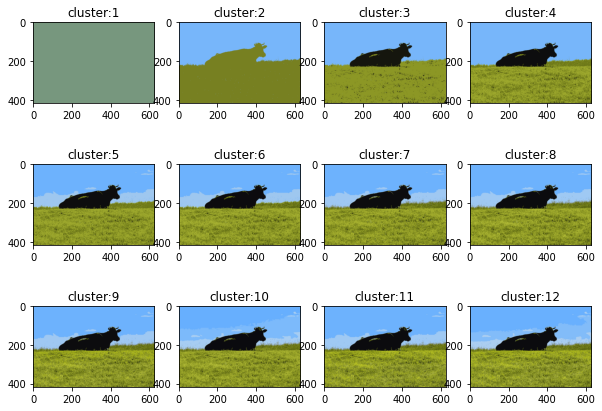

In [ ]:
#https://gist.github.com/karthikziffer/1b76705aede825ac3f269fcd62acede8
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (10, 10))
value=1

for i in range (0,12):
  # required nrows=4, required ncoms=4, index_location= i+1
  ax = fig.add_subplot(4, 4, i+1)
  # x_batch[i]: Image object at each iteration
  #img = cv2.imread('home.jpg')
  Z = img.reshape((-1,3))
  # convert to np.float32
  Z = np.float32(Z)
  # define criteria, number of clusters(K) and apply kmeans()
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = value
  ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  # Now convert back into uint8, and make original image
  center = np.uint8(center)
  res = center[label.flatten()]
  res2 = res.reshape((img.shape))
  ax.imshow(res2)
  ax.set_title(f'cluster:{value}')
  value=value+1
  #ax.imshow(x_batch[i])